In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# step-1: Generate a synthetic dataset

np.random.seed(42) # for reproducibility
x = 2 * np.random.rand(100, 1) # 100 samples, single feature
y = 4 + 3 * x + np.random.randn(100, 1) # linear relation with noise

In [3]:
# step-2: define the model and lose function

def predict(x, w, b):
    return x.dot(w) + b

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def gradients(x, y, y_pred):
    error = y_pred - y
    grad_w = 2 * x.T.dot(error) / len(x)
    grad_b = 2 * np.mean(error)
    return grad_w, grad_b

In [4]:
#step-3: Implement mini-batch gradient descent

def mini_batch_gradient_descent(x, y, batch_sizes, epochs=100, learning_rate = 0.01):
    
    histroy = {}
    
    for batch_size in batch_sizes:
        w = np.random.randn(1, 1) # Random initital weight
        b = np.random.randn() # random initial bias
        
        for epoch in range(epochs):
            shuffled_indices = np.random.permutation(len(x))
            x_shuffled = x[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            
            for i in range (0, len(x), batch_size):
                x_batch = x_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                y_pred = predict(x_batch, w, b)
                grad_w, grad_b = gradients(x_batch, y_batch, y_pred)
                
                w -= learning_rate * grad_w
                b -= learning_rate * grad_b
                
        histroy[batch_size] = (w, b)
    return histroy

In [5]:
# train with different batch sizes

batch_sizes = [1, 10, 50, 100]
history = mini_batch_gradient_descent(x, y, batch_sizes)

In [6]:
history

{1: (array([[2.73898415]]), 4.193348844367158),
 10: (array([[2.78630277]]), 4.201795174217376),
 50: (array([[2.67224555]]), 4.32426655307112),
 100: (array([[2.93947927]]), 3.9135222908891025)}

In [7]:
biases = [history[bs][1] for bs in batch_sizes]
weights = [float(history[bs][0][0]) for bs in batch_sizes]

In [8]:
# re-plotting with corrected data
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

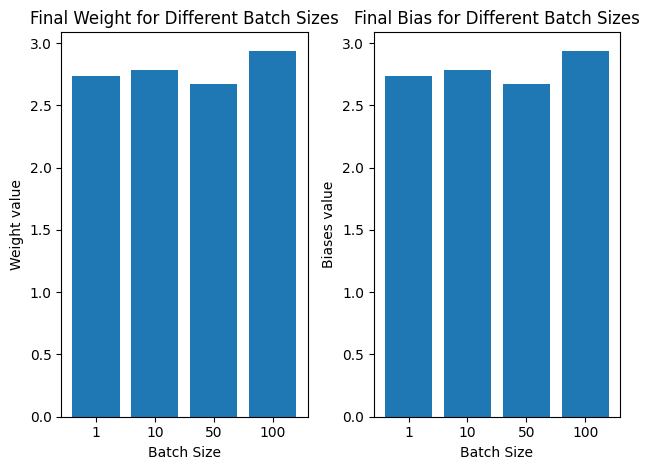

In [9]:
# weights

plt.subplot(1, 2, 1)
plt.bar(range(len(batch_sizes)), weights, tick_label = batch_sizes)
plt.xlabel('Batch Size')
plt.ylabel('Weight value')
plt.title('Final Weight for Different Batch Sizes')

# biases 

plt.subplot(1, 2, 2)
plt.bar(range(len(batch_sizes)), weights, tick_label = batch_sizes)
plt.xlabel('Batch Size')
plt.ylabel('Biases value')
plt.title('Final Bias for Different Batch Sizes')

plt.tight_layout()
plt.show()